<a href="https://colab.research.google.com/github/Venni2911/LogicMojo-AI-ML-Sept25-VenniRaj/blob/main/Venni_Housing_CW_Practice_6_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## analyse the price variant

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df =  pd.read_csv('/content/drive/MyDrive/Vennila Housing Assignment/Housing.csv')

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


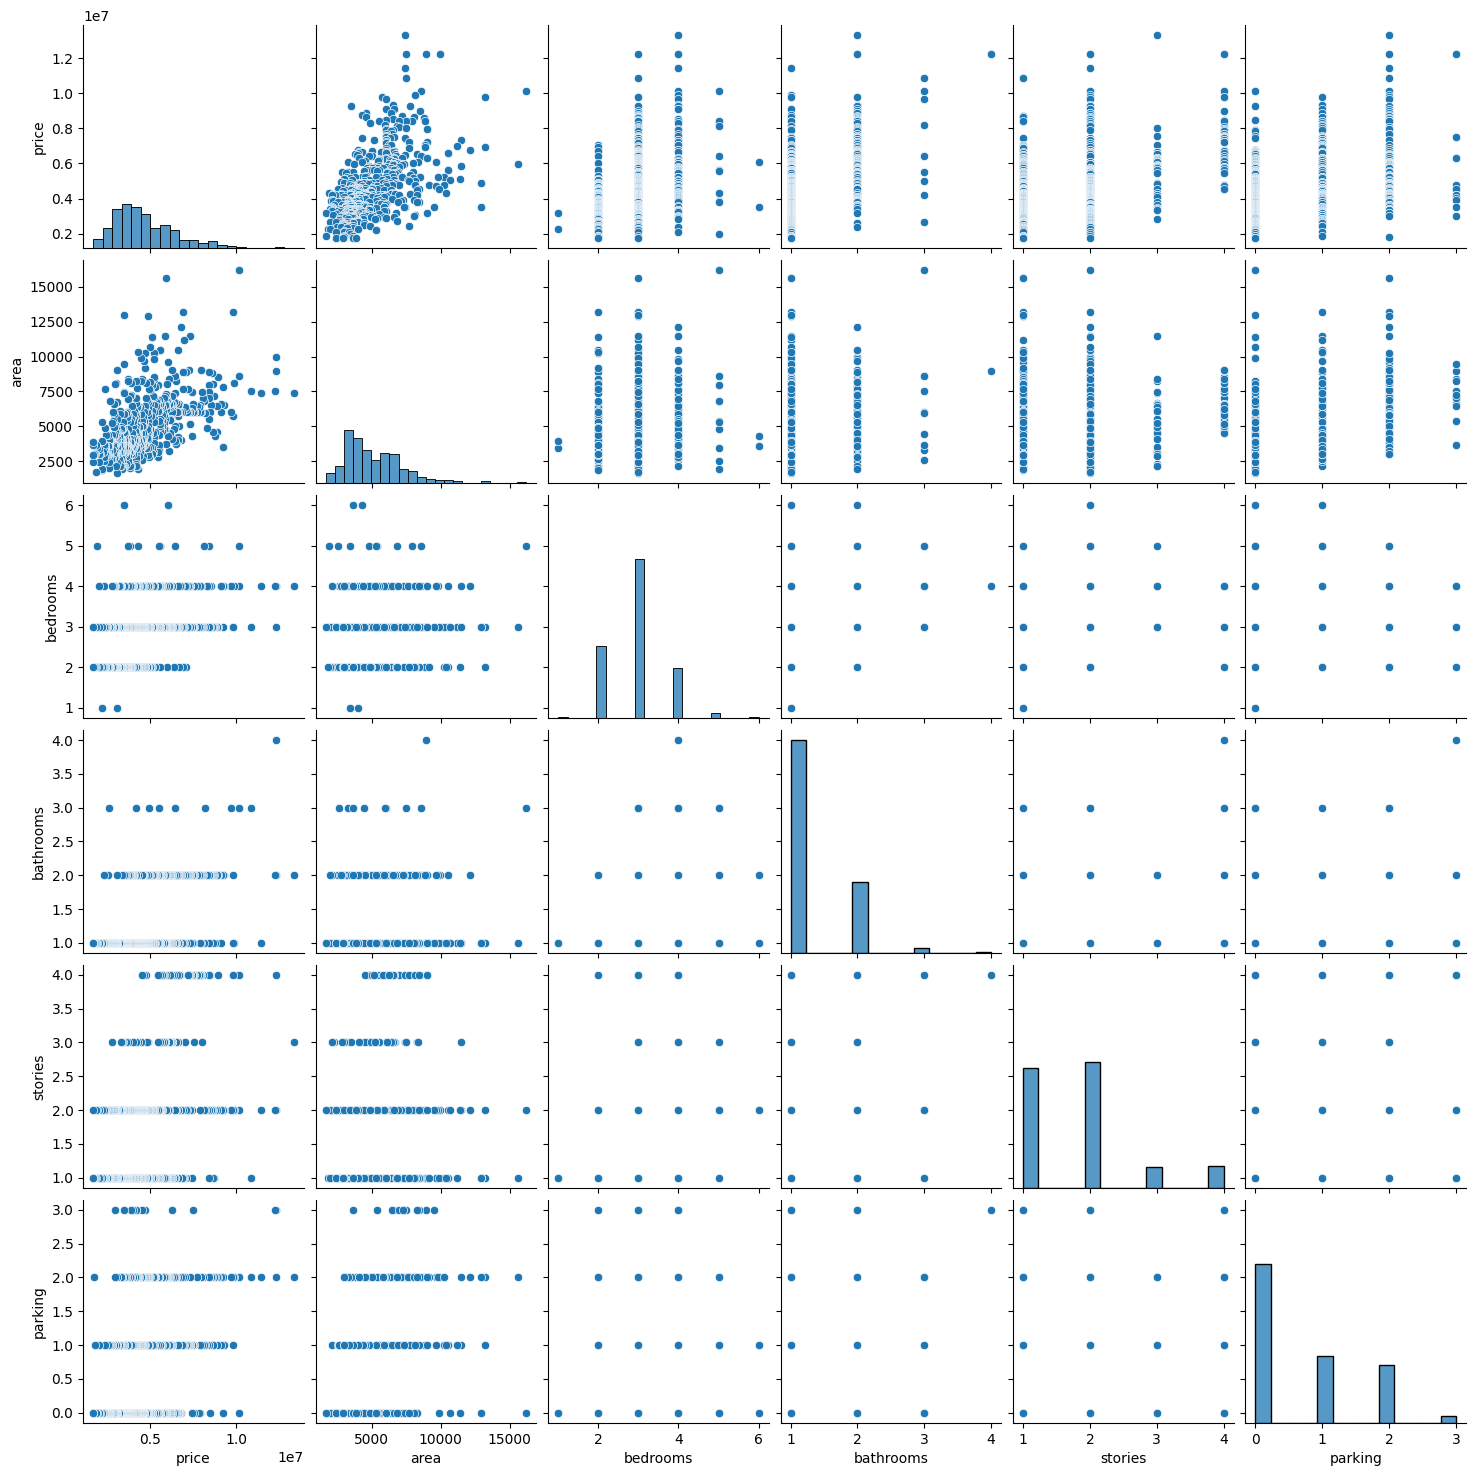

In [10]:
sns.pairplot(df)

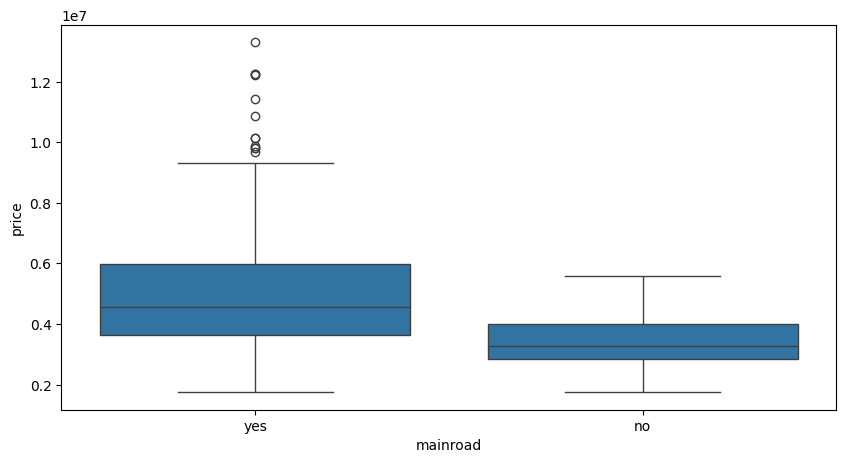

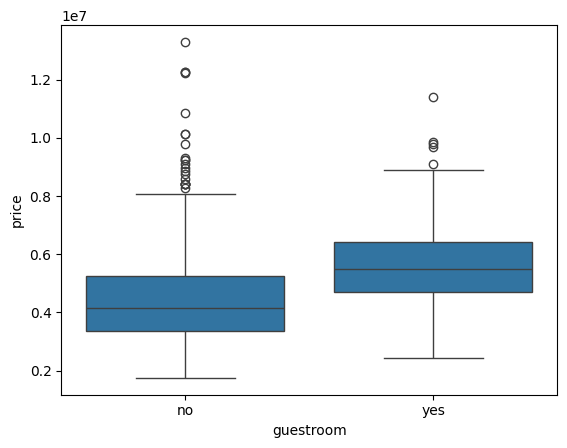

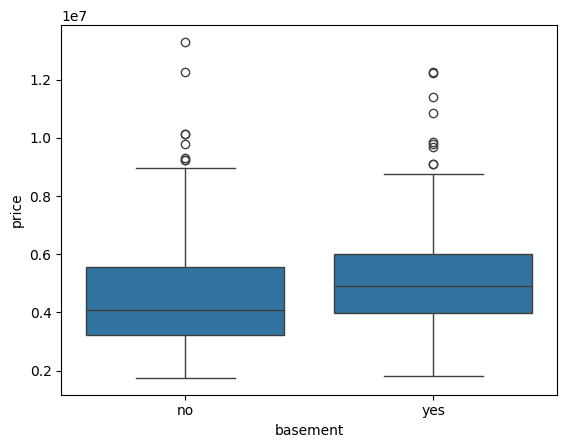

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='mainroad',y='price',data=df)
plt.show()

sns.boxplot(x='guestroom',y='price',data=df)
plt.show()

sns.boxplot(x='basement',y='price',data=df)
plt.show()

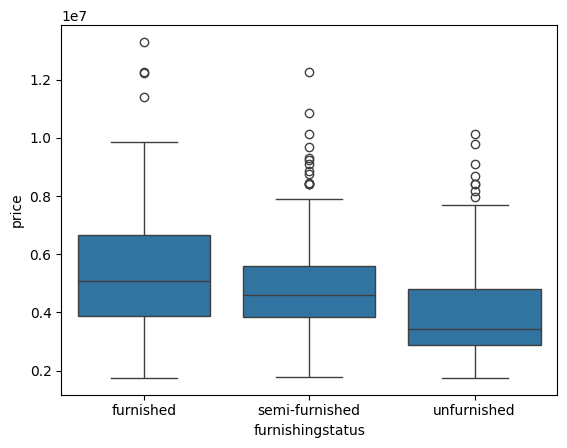

In [12]:
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.show()

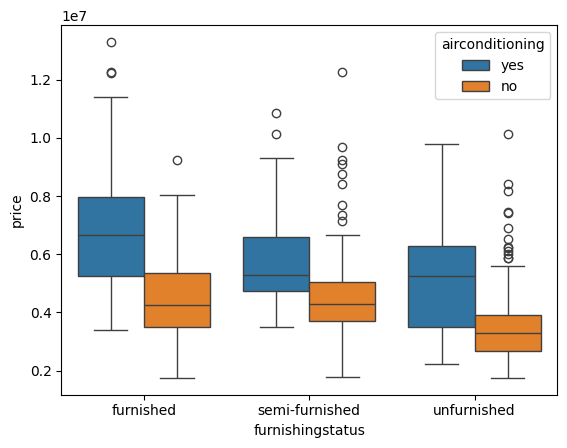

In [13]:
sns.boxplot(x='furnishingstatus',y='price',hue = 'airconditioning',data=df)
plt.show()

In [16]:
categorical = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

def binary_map (x):
  return x.map({'yes':1,'no':0})

df[categorical] = df[categorical].apply(binary_map)
df[categorical].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [19]:
### dumy variables

status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [20]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   furnished       545 non-null    bool 
 1   semi-furnished  545 non-null    bool 
 2   unfurnished     545 non-null    bool 
dtypes: bool(3)
memory usage: 1.7 KB


In [21]:
## all three status are related , if semi, unfur are false it shows that furnished is automatically true , model should know that )
##
status1 = pd.get_dummies(df['furnishingstatus'],drop_first=True)
status1.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [22]:
df = pd.concat([df,status1],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [23]:
df.drop(['furnishingstatus'],axis = 1,inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [24]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    bool 
 13  unfurnished      545 non-null    bool 
dtypes: bool(2), int64(12)
memory usage: 52.3 KB


In [26]:
### Train - Test dataset split

from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)


In [27]:
df_train.shape

(381, 14)

In [28]:
df_test.shape

(164, 14)

In [29]:
### Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_var = ['area','bedrooms','bathrooms','stories','parking','price']

df_train[num_var] = scaler.fit_transform(df_train[num_var])
## df_test[num_var] = scaler.transform(df_test[num_var])
## X_train_scaled = scaler.fit_transform(df_train)
## X_test_scaled = scaler.transform(df_test)


In [30]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


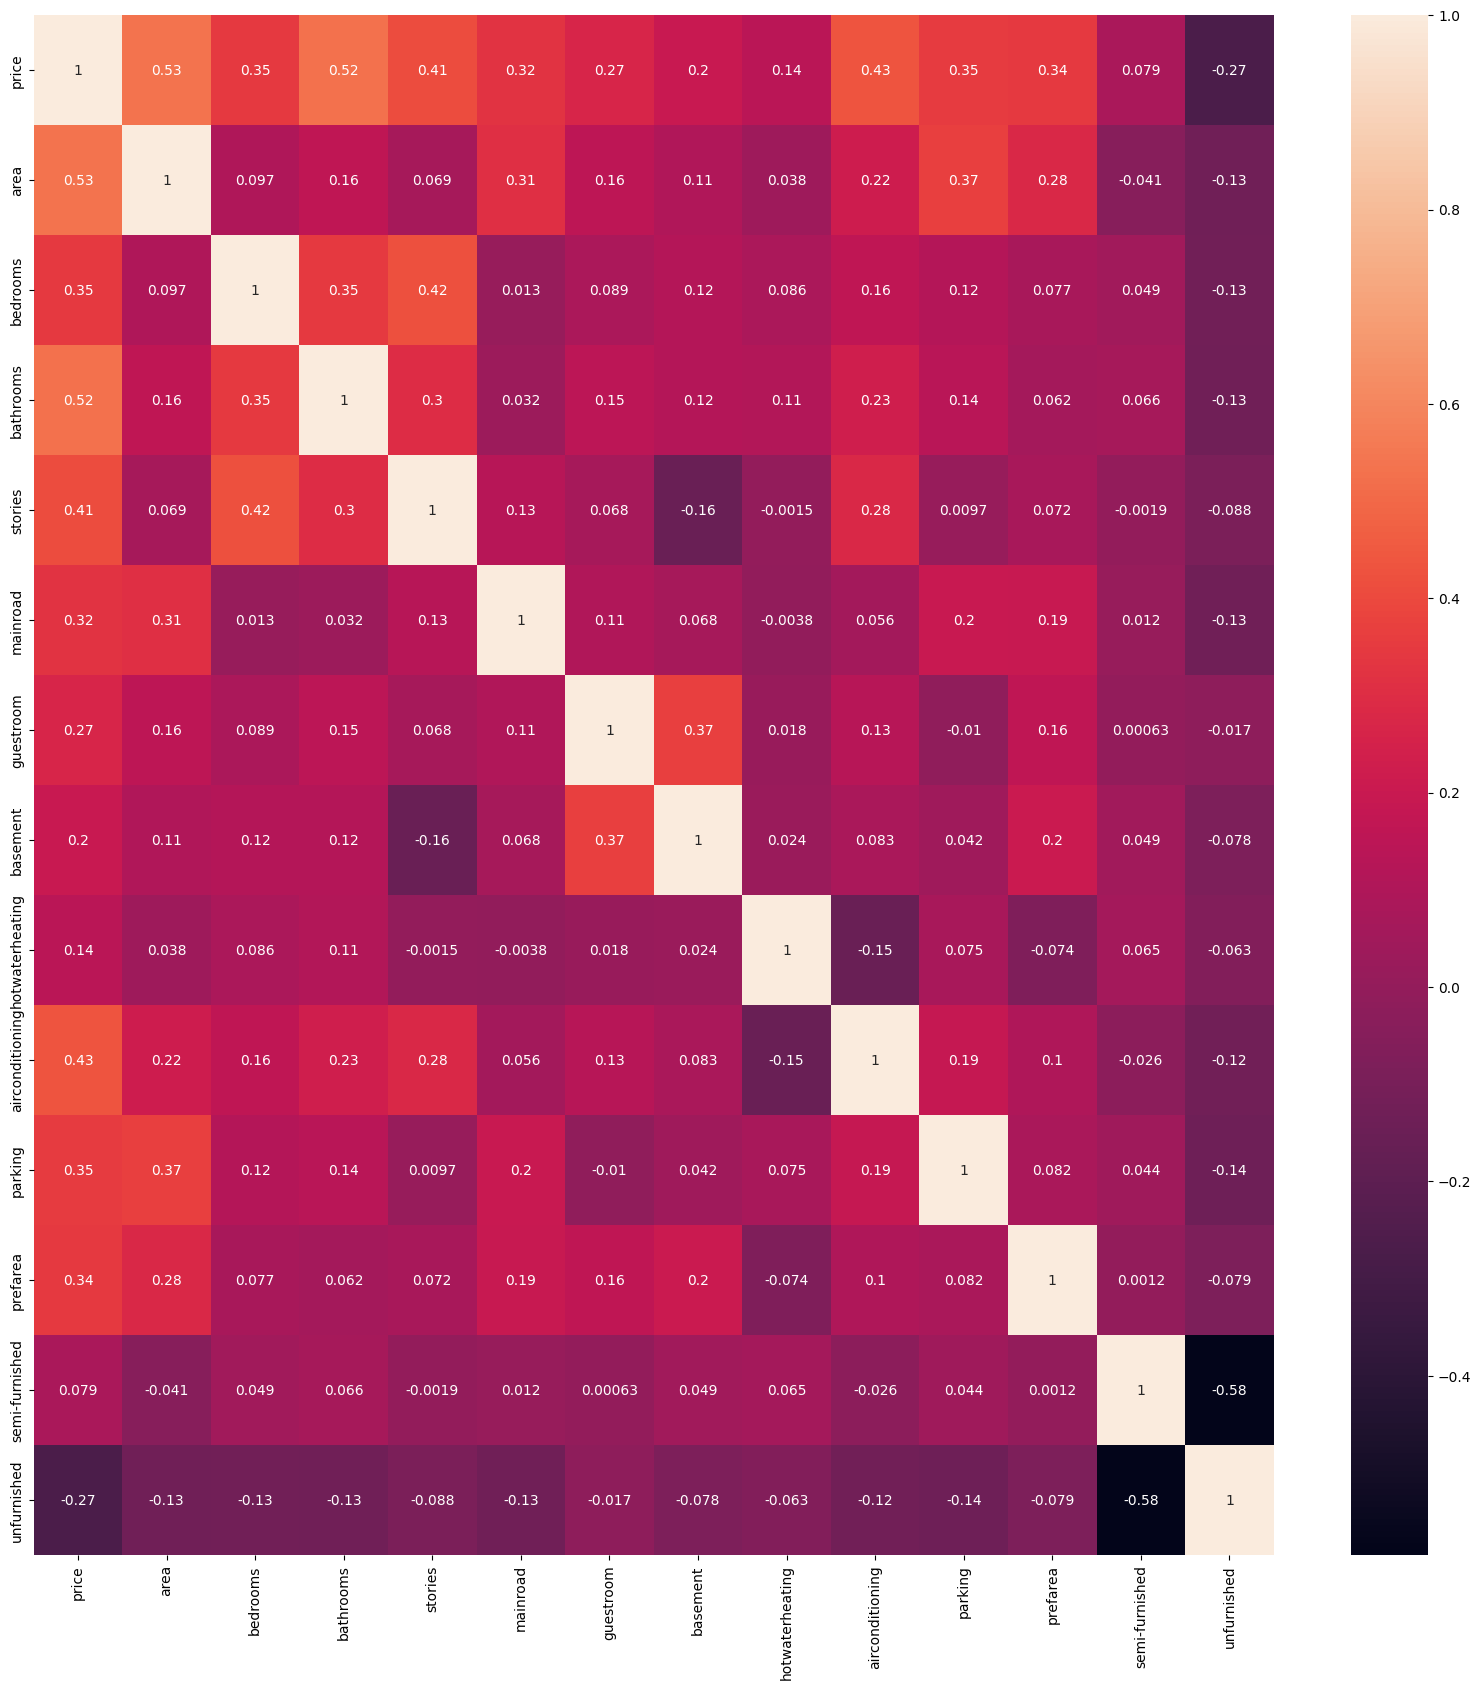

In [38]:
### Assumptions of linear regression
plt.figure(figsize=(20,20))

sns.heatmap(df_train.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Area vs Price')

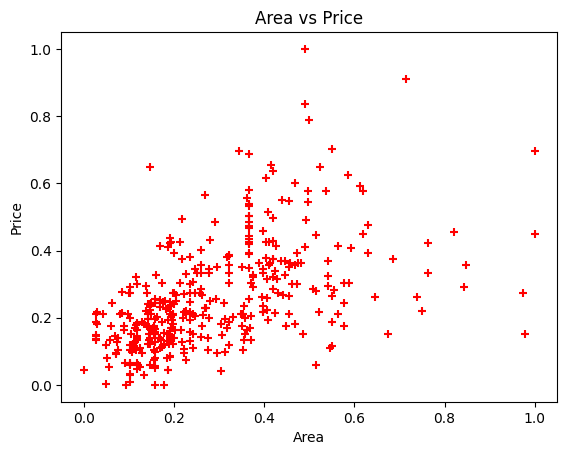

In [40]:
plt.scatter(df_train.area, df_train.price, color='red', marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')

In [56]:
### USe stats model
import statsmodels.api as sm

X = sm.add_constant(df_train['area'])   # independent variable
y = df_train['price']                   # dependent variable

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           3.15e-29
Time:                        05:55:14   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [51]:
model.params

,0
const,0.126894
area,0.462192


In [65]:
model.head()

AttributeError: 'OLSResults' object has no attribute 'head'

In [55]:
X = sm.add_constant(df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom']])
y = df_train['price']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     97.59
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           1.14e-65
Time:                        05:54:53   Log-Likelihood:                 322.60
No. Observations:                 381   AIC:                            -633.2
Df Residuals:                     375   BIC:                            -609.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0451      0.017      2.657      0.0

In [54]:
model.params

,0
const,0.045104
area,0.376516
bedrooms,0.085422
bathrooms,0.223527
stories,0.127127
guestroom,0.051989


In [57]:
y_train_predict = model.predict(X)

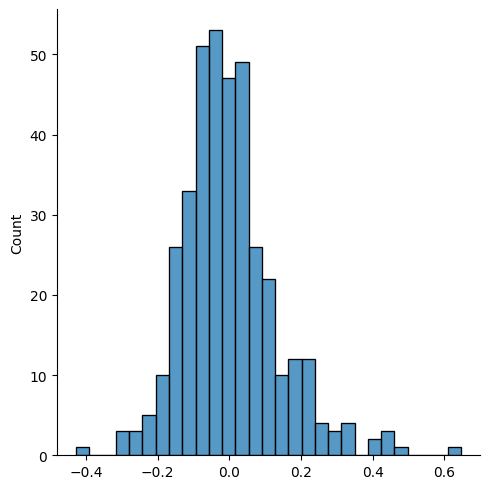

In [58]:
sns.displot(df_train['price']-y_train_predict)

In [59]:
y_test = df_test.pop('price')
X_test = df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [61]:
x_test_sm= sm.add_constant(X_test)


In [62]:
y_test_predict = model.predict(x_test_sm)

ValueError: shapes (164,14) and (2,) not aligned: 14 (dim 1) != 2 (dim 0)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# x_train should contain ONLY the independent variables (no target column)
# If you added a constant earlier, remove it for VIF calculation

vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i)
              for i in range(x_train.shape[1])]

vif["VIF"] = vif["VIF"].round(2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# x_train should contain ONLY the independent variables (no target column)
# If you added a constant earlier, remove it for VIF calculation

vif = pd.DataFrame()
vif["Features"] = X_test.columns
vif["VIF"] = [variance_inflation_factor(X_test.values, i)
              for i in range(X_test.shape[1])]

vif["VIF"] = vif["VIF"].round(2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''